# App Store *Data Science* Analysis & Findings
## Loading CSV Data File
I used Pandas, Seaborn and Matplotlib to analyze the given scraped app store data to find any emerging or relevant trends and insights. 

In [109]:
import pandas as pd
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline
data = pd.read_csv("AppStoreAssessmentDataScience.csv")

In [110]:
data

,Unnamed: 0,id,app_size_bytes,app_price,app_rating_count,app_rating,app_content_rating,app_genre,app_total_supported_langs
0,1,281656475,100788224,3.99,21292,4.0,4+,Games,10
1,2,281796108,158578688,0.00,161065,4.0,4+,Productivity,23
2,3,281940292,100524032,0.00,188583,3.5,4+,Weather,3
3,4,282614216,128512000,0.00,262241,4.0,12+,Shopping,9
4,5,282935706,92774400,0.00,985920,4.5,4+,Reference,45
5,6,283619399,10485713,0.99,8253,4.0,4+,Games,1
6,7,283646709,227795968,0.00,119487,4.0,4+,Finance,19
7,8,284035177,130242560,0.00,1126879,4.0,12+,Music,1
8,9,284666222,49250304,9.99,1117,4.5,4+,Utilities,1
9,10,284736660,70023168,3.99,7885,4.0,4+,Games,10


### A quick look at data described

In [111]:
data.describe()

,Unnamed: 0,id,app_size_bytes,app_price,app_rating_count,app_rating,app_total_supported_langs
count,7197.000000,7.197000e+03,7.197000e+03,7197.000000,7.197000e+03,7197.000000,7197.000000
mean,4759.069612,8.631310e+08,1.991345e+08,1.726218,1.289291e+04,3.526956,5.434903
std,3093.625213,2.712368e+08,3.592069e+08,5.833006,7.573941e+04,1.517948,7.919593
min,1.000000,2.816565e+08,5.898240e+05,0.000000,0.000000e+00,0.000000,0.000000
25%,2090.000000,6.000937e+08,4.692275e+07,0.000000,2.800000e+01,3.500000,1.000000
50%,4380.000000,9.781482e+08,9.715302e+07,0.000000,3.000000e+02,4.000000,1.000000
75%,7223.000000,1.082310e+09,1.819249e+08,1.990000,2.793000e+03,4.500000,8.000000
max,11097.000000,1.188376e+09,4.025970e+09,299.990000,2.974676e+06,5.000000,75.000000


## Cross analysis between Application Languages Supported & Ratings

In [112]:
def count_rows(rows):
    return len(rows)

by_data = data.groupby('app_rating').apply(count_rows)

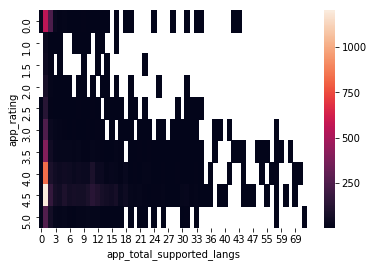

In [113]:
by_cross = data.groupby('app_rating app_total_supported_langs'.split()).apply(count_rows).unstack()
seaborn.heatmap(by_cross)

Something to keep in mind right off the bat is the desired audience for our product. We want to make our projects able to accomadate to the right people and one of the biggest ways to do that is with language accessability. When you exclude many of the 0 ratings from non or low review counts, it seems that many of the 3.0+ rated apps support up to 30 languages.

## Pricing Standards in Current Market
showing only snippets of charts to show trends, outliers not displayed here

### Applications Price by Size(bytes)

(0, 31)

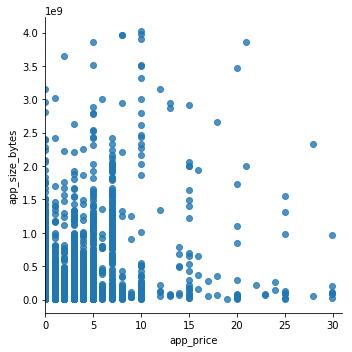

In [114]:
seaborn.lmplot(x='app_price', y='app_size_bytes', data=data, fit_reg=False)

plt.xlim(0, 31)

### Genres Application Price by Rating

(0, 41)

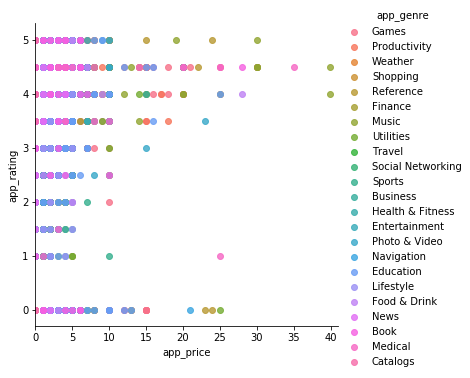

In [115]:
seaborn.lmplot(x='app_price', y='app_rating', data=data, fit_reg=False, hue='app_genre')

plt.xlim(0, 41)

Based on the two graphs above, we're seeing less of an increase in price based on application size and more patterns among application rating and genre. Looking at the lower of the two graphs we see app genres like Book, News, Food & Drink, etc tend to stay in the less than $7 range despite rating. However, apps in genres such as utlilites and productivity seem to rise in ratings proportionaly to their price increases.

## Findings
Going foreward with Xbot or any other future projects, we should keep in mind application size, genre, and supported languages. Even just supporting 9 languages, instead of only 1, seems to put us in a sweet spot for accessability comparitive to the current market. Stay aware of increasing application size and/or scope creep, as it has not shown to be a quantifier to the customer for a higher price. On a similar note, we need to be conscious about the genre of our products relative to the price they can survive at in the current market. 